# Chronic Kidney Disease Prediction

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# EDA

In [2]:
# loading data

df= pd.read_csv('/content/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [4]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [7]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [8]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [9]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [10]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

<ipython-input-10-c11ca0a5f27d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)


In [11]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [12]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



<ipython-input-13-ae996209c872>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-13-ae996209c872>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-13-ae996209c872>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in s

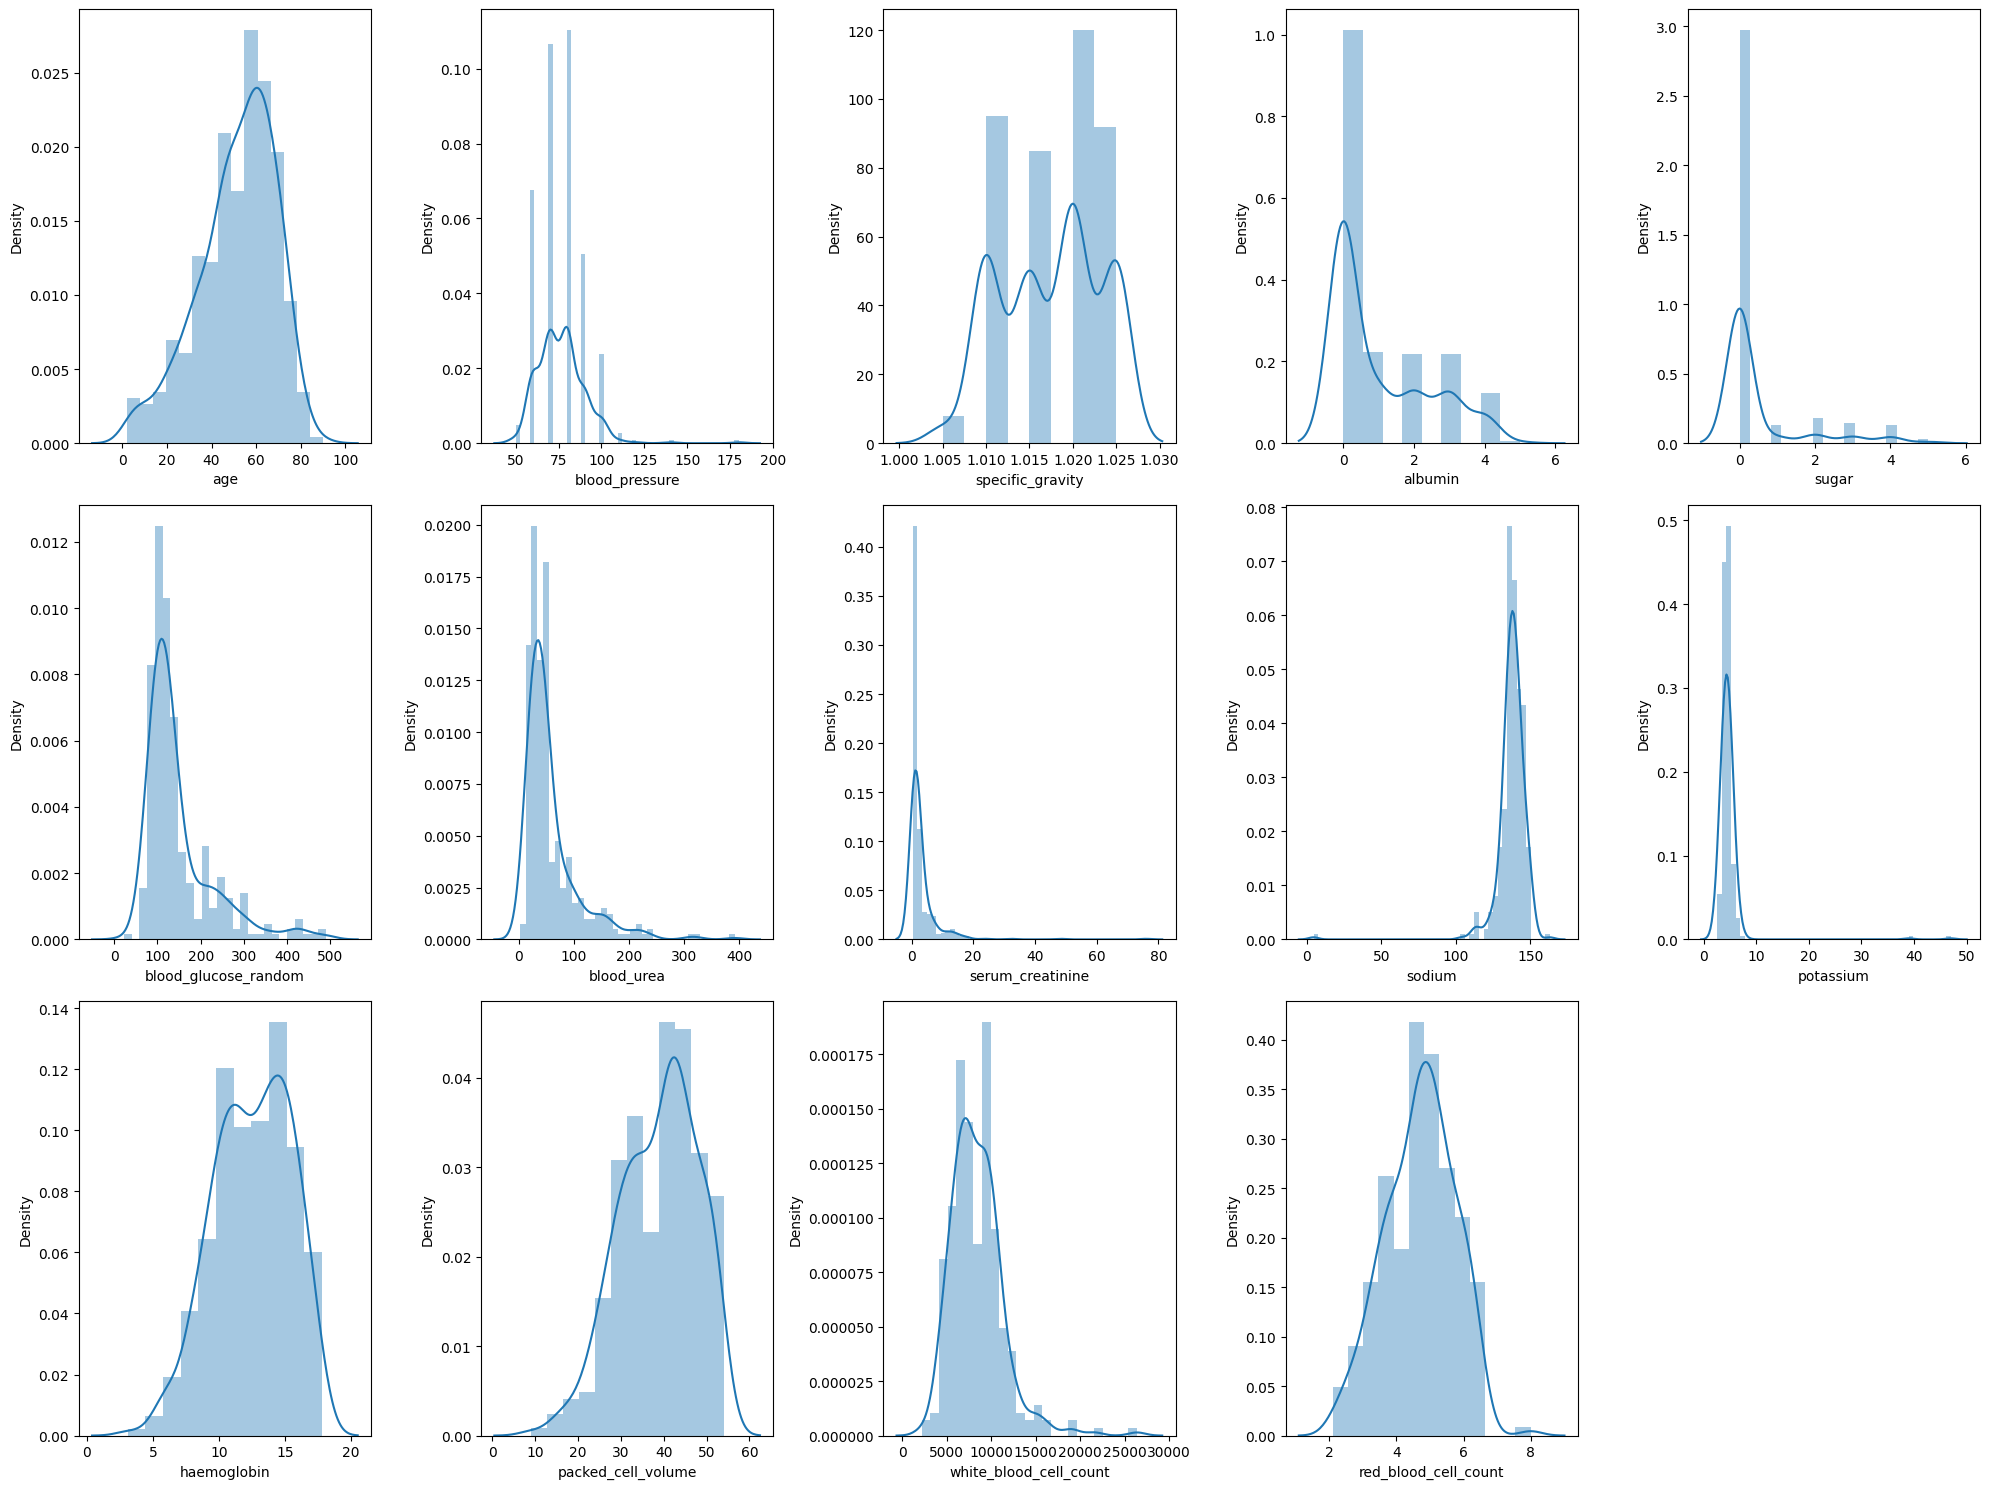

In [13]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [14]:
print(df[column].unique())

[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6.5]


In [15]:
# Example: Replace 'normal' with a valid numeric value (replace it with your appropriate handling)
df[column].replace('normal', 0, inplace=True)
# Example: Replace 'abnormal' with a valid numeric value (replace it with your appropriate handling)
df[column].replace('abnormal', 0, inplace=True)
# Example: Replace 'normal' with a valid numeric value (replace it with your appropriate handling)
df[column].replace('normal', 0, inplace=True)

<ipython-input-15-dab63e933417>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace('normal', 0, inplace=True)
<ipython-input-15-dab63e933417>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [16]:
print(df[column].dtype)

float64


In [17]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

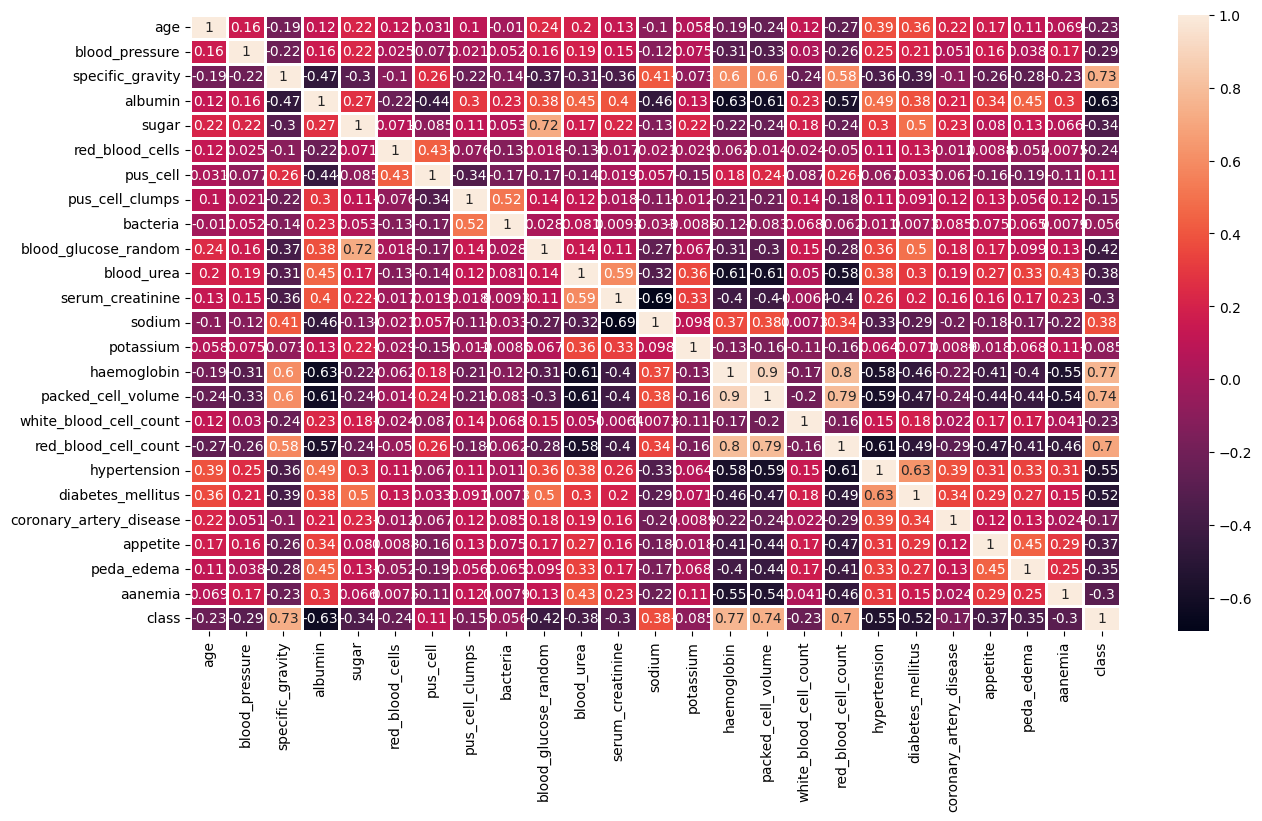

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'White')
plt.show()


# Data Pre Processing

In [19]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

,0
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
haemoglobin,52
sugar,49
specific_gravity,47
albumin,46
blood_glucose_random,44


In [20]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [21]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)
df[num_cols].isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0


In [22]:
df[cat_cols].isnull().sum()

,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0
appetite,0
peda_edema,0
aanemia,0


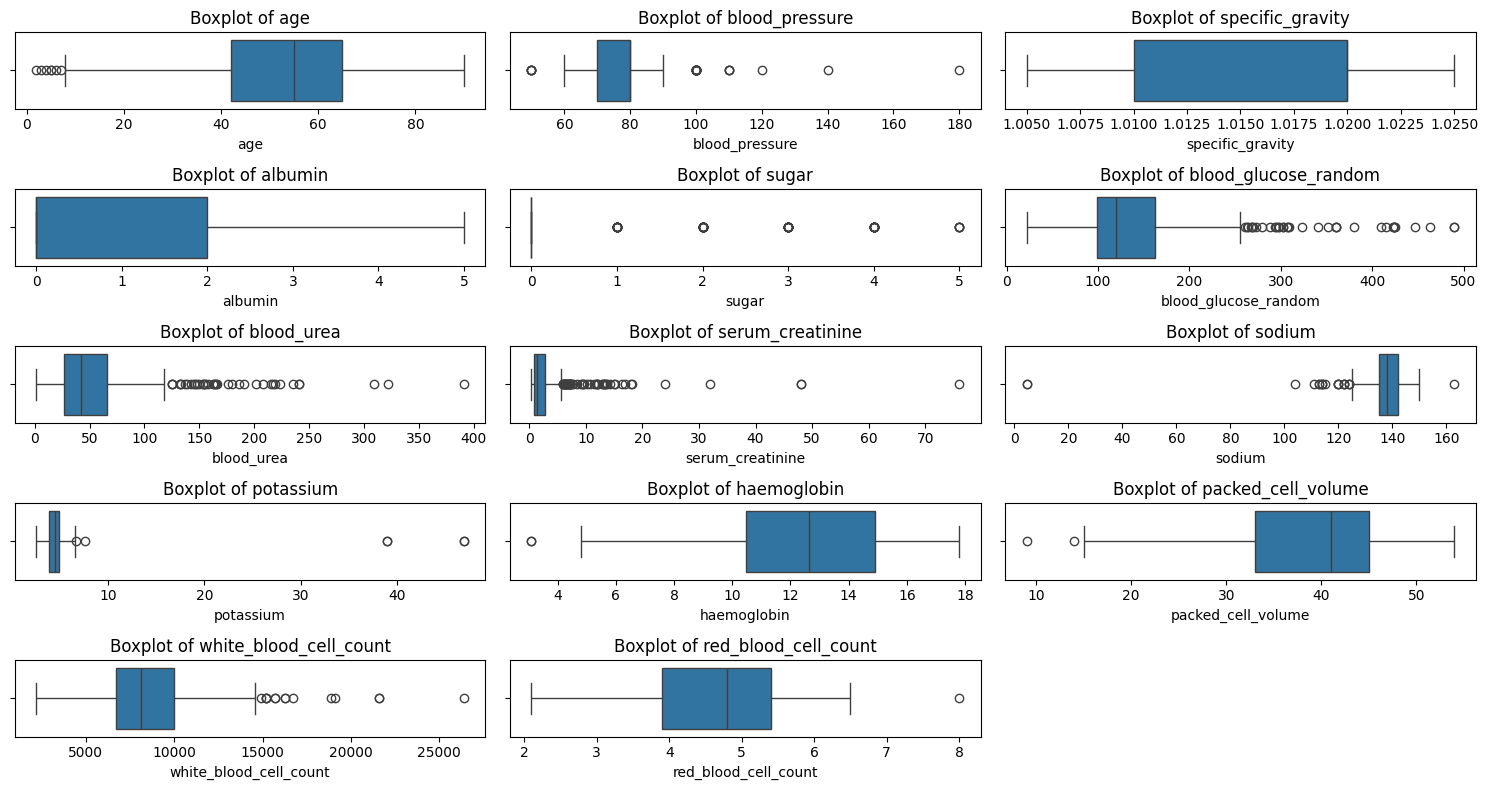

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named 'df' with categorical columns encoded
# using LabelEncoder as shown in your code

# Box plots for numeric columns to visualize outliers
numeric_cols = df.select_dtypes(include=['float64']).columns
num_plots = len(numeric_cols)

# Calculate the number of rows and columns needed for subplots
num_rows = (num_plots // 3) + (num_plots % 3 > 0)
num_cols = min(num_plots, 3)

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()



# Feature Encoding

In [24]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 3 categories

pus_cell has 3 categories

pus_cell_clumps has 3 categories

bacteria has 3 categories

hypertension has 3 categories

diabetes_mellitus has 3 categories

coronary_artery_disease has 3 categories

appetite has 3 categories

peda_edema has 3 categories

aanemia has 3 categories

class has 2 categories



In [25]:
#As all of the categorical columns have 2 categories we can use label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,169.0,...,38.0,6000.0,6.5,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [26]:
df.shape

(400, 25)

# Model Building

In [27]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [28]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [30]:
import pandas as pd

# Assuming df is your DataFrame
df.to_csv('Chronic_kidney_disease_updated.csv', index=False)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = '/content/Chronic_kidney_disease_updated.csv'
df = pd.read_csv(file_path)

ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg_acc = accuracy_score(y_test, logreg.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, logreg.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {logreg_acc} \n")

print(f"Confusion Matrix:\n{confusion_matrix(y_test, logreg.predict(X_test))}\n")
print(f"Classification Report:\n{classification_report(y_test, logreg.predict(X_test))}")


Training Accuracy of Logistic Regression is 0.903125
Test Accuracy of Logistic Regression is 0.925 

Confusion Matrix:
[[47  5]
 [ 1 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.84      0.96      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Classifier

In [32]:
pip install --upgrade scikit-learn

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = '/content/Chronic_kidney_disease_updated.csv'
df = pd.read_csv(file_path)

ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_acc = accuracy_score(y_test, rfc.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rfc.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rfc_acc} \n")

print(f"Confusion Matrix:\n{confusion_matrix(y_test, rfc.predict(X_test))}\n")
print(f"Classification Report:\n{classification_report(y_test, rfc.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9875 

Confusion Matrix:
[[52  0]
 [ 1 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



# Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

file_path = '/content/Chronic_kidney_disease_updated.csv'
df = pd.read_csv(file_path)

ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9375 

Confusion Matrix :- 
[[50  2]
 [ 3 25]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

file_path = '/content/Chronic_kidney_disease_updated.csv'
df = pd.read_csv(file_path)

ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure data is contiguous
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc}\n")

print(f"Confusion Matrix:\n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report:\n{classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.78125
Test Accuracy of KNN is 0.725

Confusion Matrix:
[[35 17]
 [ 5 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        52
           1       0.57      0.82      0.68        28

    accuracy                           0.72        80
   macro avg       0.72      0.75      0.72        80
weighted avg       0.77      0.72      0.73        80



# Ada Boost Classifier

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = '/content/Chronic_kidney_disease_updated.csv'
df = pd.read_csv(file_path)

ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of AdaBoost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of AdaBoost Classifier is {ada_acc} \n")

print(f"Confusion Matrix:\n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report:\n{classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of AdaBoost Classifier is 1.0
Test Accuracy of AdaBoost Classifier is 0.975 

Confusion Matrix:
[[51  1]
 [ 1 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



# Gradient Boosting Classifier

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


file_path = '/content/Chronic_kidney_disease_updated.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gbc.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gbc_acc} \n")

print(f"Confusion Matrix:\n{confusion_matrix(y_test, gbc.predict(X_test))}\n")
print(f"Classification Report:\n{classification_report(y_test, gbc.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.975 

Confusion Matrix:
[[52  0]
 [ 2 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



# Stochastic Gradient Boosting (SGB)

In [38]:

file_path = '/content/Chronic_kidney_disease_updated.csv'
df = pd.read_csv(file_path)

ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'
X = df[ind_col]
y = df[dep_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sgb = GradientBoostingClassifier(random_state=42)
sgb.fit(X_train, y_train)
sgb_acc = accuracy_score(y_test, gbc.predict(X_test))


print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")


Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.975 

Confusion Matrix :- 
[[52  0]
 [ 2 26]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



# XgBoost

In [39]:
pip install xgboost

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = '/content/Chronic_kidney_disease_updated.csv'
df = pd.read_csv(file_path)

ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'
X = df[ind_col]
y = df[dep_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XGBoost Classifier is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XGBoost Classifier is {xgb_acc} \n")

print(f"Confusion Matrix:\n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report:\n{classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XGBoost Classifier is 1.0
Test Accuracy of XGBoost Classifier is 0.9625 

Confusion Matrix:
[[51  1]
 [ 2 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.96      0.93      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



# Cat Boost Classifier

In [41]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = '/content/Chronic_kidney_disease_updated.csv'
df = pd.read_csv(file_path)

ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'
X = df[ind_col]
y = df[dep_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
catboost = CatBoostClassifier(random_state=42)
catboost.fit(X_train, y_train)
catboost_acc = accuracy_score(y_test, catboost.predict(X_test))




Learning rate set to 0.006333
0:	learn: 0.6834730	total: 54.5ms	remaining: 54.4s
1:	learn: 0.6732602	total: 61.4ms	remaining: 30.7s
2:	learn: 0.6631845	total: 69.2ms	remaining: 23s
3:	learn: 0.6527873	total: 82.6ms	remaining: 20.6s
4:	learn: 0.6440832	total: 96.7ms	remaining: 19.2s
5:	learn: 0.6344490	total: 104ms	remaining: 17.3s
6:	learn: 0.6239462	total: 113ms	remaining: 16.1s
7:	learn: 0.6124124	total: 124ms	remaining: 15.4s
8:	learn: 0.6034892	total: 138ms	remaining: 15.2s
9:	learn: 0.5929883	total: 152ms	remaining: 15s
10:	learn: 0.5839943	total: 163ms	remaining: 14.7s
11:	learn: 0.5744377	total: 177ms	remaining: 14.6s
12:	learn: 0.5666054	total: 194ms	remaining: 14.7s
13:	learn: 0.5584033	total: 206ms	remaining: 14.5s
14:	learn: 0.5505018	total: 210ms	remaining: 13.8s
15:	learn: 0.5426937	total: 219ms	remaining: 13.5s
16:	learn: 0.5336554	total: 230ms	remaining: 13.3s
17:	learn: 0.5253615	total: 246ms	remaining: 13.4s
18:	learn: 0.5190510	total: 254ms	remaining: 13.1s
19:	learn:

In [43]:
print(f"Training Accuracy of CatBoost Classifier is {accuracy_score(y_train, catboost.predict(X_train))}")
print(f"Test Accuracy of CatBoost Classifier is {catboost_acc} \n")

print(f"Confusion Matrix:\n{confusion_matrix(y_test, catboost.predict(X_test))}\n")
print(f"Classification Report:\n{classification_report(y_test, catboost.predict(X_test))}")

Training Accuracy of CatBoost Classifier is 1.0
Test Accuracy of CatBoost Classifier is 0.975 

Confusion Matrix:
[[52  0]
 [ 2 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



# Extra Trees Classifier

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = '/content/Chronic_kidney_disease_updated.csv'
df = pd.read_csv(file_path)

ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X_train, y_train)

extra_trees_acc = accuracy_score(y_test, extra_trees.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, extra_trees.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {extra_trees_acc} \n")

print(f"Confusion Matrix:\n{confusion_matrix(y_test, extra_trees.predict(X_test))}\n")
print(f"Classification Report:\n{classification_report(y_test, extra_trees.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.975 

Confusion Matrix:
[[52  0]
 [ 2 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



# Naive Bayes Classifier

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nvb = GaussianNB()
nvb.fit(X_train, y_train)

nvb_acc = accuracy_score(y_test, nvb.predict(X_test))

print(f"Training Accuracy of Naive Bayes Classifier is {accuracy_score(y_train, nvb.predict(X_train))}")
print(f"Test Accuracy of Naive Bayes Classifier is {nvb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, nvb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, nvb.predict(X_test))}")

Training Accuracy of Naive Bayes Classifier is 0.94375
Test Accuracy of Naive Bayes Classifier is 0.9375 

Confusion Matrix :- 
[[50  2]
 [ 3 25]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



In [46]:
pip install imbalanced-learn

In [47]:
pip install tabulate


In [48]:
from tabulate import tabulate


In [51]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

# Assuming you have a CSV file named 'your_dataset.csv'
# Replace this with the actual path to your dataset
file_path = '/content/Chronic_kidney_disease_updated.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=45)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create models
logreg = LogisticRegression(random_state=45)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=45)
rfc = RandomForestClassifier(random_state=45)
ada = AdaBoostClassifier(random_state=45)
gb = GradientBoostingClassifier(random_state=45)
sgb = SGDClassifier(random_state=45)
xgb = XGBClassifier(random_state=45)
catboost = CatBoostClassifier(random_state=45)
etc = ExtraTreesClassifier(random_state=45)
nb = GaussianNB()

# Train models
logreg.fit(X_train_resampled, y_train_resampled)
knn.fit(X_train_resampled, y_train_resampled)
dtc.fit(X_train_resampled, y_train_resampled)
rfc.fit(X_train_resampled, y_train_resampled)
ada.fit(X_train_resampled, y_train_resampled)
gb.fit(X_train_resampled, y_train_resampled)
sgb.fit(X_train_resampled, y_train_resampled)
xgb.fit(X_train_resampled, y_train_resampled)
catboost.fit(X_train_resampled, y_train_resampled)
etc.fit(X_train_resampled, y_train_resampled)
nb.fit(X_train_resampled, y_train_resampled)

# Evaluate models
logreg_acc = accuracy_score(y_test, logreg.predict(X_test))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
rfc_acc = accuracy_score(y_test, rfc.predict(X_test))
ada_acc = accuracy_score(y_test, ada.predict(X_test))
gb_acc = accuracy_score(y_test, gb.predict(X_test))
sgb_acc = accuracy_score(y_test, sgb.predict(X_test))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
cat_acc = accuracy_score(y_test, catboost.predict(X_test))
etc_acc = accuracy_score(y_test, etc.predict(X_test))
nb_acc = accuracy_score(y_test, nb.predict(X_test))

logreg_prec = precision_score(y_test, logreg.predict(X_test))
knn_prec = precision_score(y_test, knn.predict(X_test))
dtc_prec = precision_score(y_test, dtc.predict(X_test))
rfc_prec = precision_score(y_test, rfc.predict(X_test))
ada_prec = precision_score(y_test, ada.predict(X_test))
gb_prec = precision_score(y_test, gb.predict(X_test))
sgb_prec = precision_score(y_test, sgb.predict(X_test))
xgb_prec = precision_score(y_test, xgb.predict(X_test))
cat_prec = precision_score(y_test, catboost.predict(X_test))
etc_prec = precision_score(y_test, etc.predict(X_test))
nb_prec = precision_score(y_test, nb.predict(X_test))

logreg_recall = recall_score(y_test, logreg.predict(X_test))
knn_recall = recall_score(y_test, knn.predict(X_test))
dtc_recall = recall_score(y_test, dtc.predict(X_test))
rfc_recall = recall_score(y_test, rfc.predict(X_test))
ada_recall = recall_score(y_test, ada.predict(X_test))
gb_recall = recall_score(y_test, gb.predict(X_test))
sgb_recall = recall_score(y_test, sgb.predict(X_test))
xgb_recall = recall_score(y_test, xgb.predict(X_test))
cat_recall = recall_score(y_test, catboost.predict(X_test))
etc_recall = recall_score(y_test, etc.predict(X_test))
nb_recall = recall_score(y_test, nb.predict(X_test))

logreg_f1 = f1_score(y_test, logreg.predict(X_test))
knn_f1 = f1_score(y_test, knn.predict(X_test))
dtc_f1 = f1_score(y_test, dtc.predict(X_test))
rfc_f1 = f1_score(y_test, rfc.predict(X_test))
ada_f1 = f1_score(y_test, ada.predict(X_test))
gb_f1 = f1_score(y_test, gb.predict(X_test))
sgb_f1 = f1_score(y_test, sgb.predict(X_test))
xgb_f1 = f1_score(y_test, xgb.predict(X_test))
cat_f1 = f1_score(y_test, catboost.predict(X_test))
etc_f1 = f1_score(y_test, etc.predict(X_test))
nb_f1 = f1_score(y_test, nb.predict(X_test))

# Create a DataFrame with the results
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
        'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Stochastic Gradient Boosting',
        'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'Naive Bayes Classifier'
    ],
    'Accuracy': [logreg_acc, knn_acc, dtc_acc, rfc_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc, nb_acc],
    'Precision': [logreg_prec, knn_prec, dtc_prec, rfc_prec, ada_prec, gb_prec, sgb_prec, xgb_prec, cat_prec, etc_prec, nb_prec],
    'Recall': [logreg_recall, knn_recall, dtc_recall, rfc_recall, ada_recall, gb_recall, sgb_recall, xgb_recall, cat_recall, etc_recall, nb_recall],
    'F1-Score': [logreg_f1, knn_f1, dtc_f1, rfc_f1, ada_f1, gb_f1, sgb_f1, xgb_f1, cat_f1, etc_f1, nb_f1]
})

# Sort the DataFrame by accuracy in descending order
models_sorted = models.sort_values(by='Accuracy', ascending=False)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.006937
0:	learn: 0.6822330	total: 3.1ms	remaining: 3.1s
1:	learn: 0.6695092	total: 5.68ms	remaining: 2.83s
2:	learn: 0.6569672	total: 8.27ms	remaining: 2.75s
3:	learn: 0.6458547	total: 10.9ms	remaining: 2.72s
4:	learn: 0.6332629	total: 13.4ms	remaining: 2.67s
5:	learn: 0.6200679	total: 15.9ms	remaining: 2.63s
6:	learn: 0.6087256	total: 18.4ms	remaining: 2.61s
7:	learn: 0.5988662	total: 21.1ms	remaining: 2.61s
8:	learn: 0.5892339	total: 23.5ms	remaining: 2.59s
9:	learn: 0.5780206	total: 25.9ms	remaining: 2.56s
10:	learn: 0.5682686	total: 28.3ms	remaining: 2.54s
11:	learn: 0.5573655	total: 30.7ms	remaining: 2.52s
12:	learn: 0.5490052	total: 33ms	remaining: 2.51s
13:	learn: 0.5411851	total: 35.4ms	remaining: 2.49s
14:	learn: 0.5318584	total: 37.7ms	remaining: 2.48s
15:	learn: 0.5256475	total: 40ms	remaining: 2.46s
16:	learn: 0.5185455	total: 42.2ms	remaining: 2.44s
17:	learn: 0.5090572	total: 44.5ms	remaining: 2.43s
18:	learn: 0.5016825	total: 47.1ms	remaining: 2.43

In [52]:
# Print the sorted table
print(tabulate(models_sorted, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│    │ Model                        │   Accuracy │   Precision │   Recall │   F1-Score │
╞════╪══════════════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│  3 │ Random Forest Classifier     │     0.9875 │    1        │ 0.964286 │   0.981818 │
├────┼──────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  4 │ Ada Boost Classifier         │     0.975  │    0.964286 │ 0.964286 │   0.964286 │
├────┼──────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  5 │ Gradient Boosting Classifier │     0.975  │    1        │ 0.928571 │   0.962963 │
├────┼──────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  8 │ Cat Boost                    │     0.975  │    1        │ 0.928571 │   0.962963 │
├────┼──────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  9 │ Extra Trees Cl

In [57]:
# Calculate confusion matrices
logreg_pred = logreg.predict(X_test) # Generate predictions for Logistic Regression
knn_pred = knn.predict(X_test)       # Generate predictions for KNN
dtc_pred = dtc.predict(X_test)       # Generate predictions for Decision Tree
rfc_pred = rfc.predict(X_test)       # Generate predictions for Random Forest
ada_pred = ada.predict(X_test)       # Generate predictions for AdaBoost
gb_pred = gb.predict(X_test)         # Generate predictions for Gradient Boosting
sgb_pred = sgb.predict(X_test)       # Generate predictions for Stochastic Gradient Boosting
xgb_pred = xgb.predict(X_test)       # Generate predictions for XGBoost
cat_pred = catboost.predict(X_test)   # Generate predictions for CatBoost
etc_pred = etc.predict(X_test)       # Generate predictions for Extra Trees
nb_pred = nb.predict(X_test)         # Generate predictions for Naive Bayes

# Calculate confusion matrices for each model
logreg_cm = confusion_matrix(y_test, logreg_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
dtc_cm = confusion_matrix(y_test, dtc_pred)
rfc_cm = confusion_matrix(y_test, rfc_pred)
ada_cm = confusion_matrix(y_test, ada_pred)
gb_cm = confusion_matrix(y_test, gb_pred)
sgb_cm = confusion_matrix(y_test, sgb_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)
cat_cm = confusion_matrix(y_test, cat_pred)
etc_cm = confusion_matrix(y_test, etc_pred)
nb_cm = confusion_matrix(y_test, nb_pred)


# Create a DataFrame with confusion matrices
cm_data = {
    'Model': [
        'Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
        'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Stochastic Gradient Boosting',
        'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'Naive Bayes Classifier'
    ],
    'Confusion Matrix': [
        logreg_cm, knn_cm, dtc_cm, rfc_cm, ada_cm, gb_cm, sgb_cm, xgb_cm, cat_cm, etc_cm, nb_cm
    ]
}

cm_df = pd.DataFrame(cm_data)
# Convert confusion matrices to strings before using tabulate
cm_df['Confusion Matrix'] = cm_df['Confusion Matrix'].apply(lambda cm: np.array2string(cm))

# Print the confusion matrices using tabulate
print(tabulate(cm_df, headers='keys', tablefmt='fancy_grid', showindex=False))



╒══════════════════════════════╤════════════════════╕
│ Model                        │ Confusion Matrix   │
╞══════════════════════════════╪════════════════════╡
│ Logistic Regression          │ [[45  7]           │
│                              │  [ 1 27]]          │
├──────────────────────────────┼────────────────────┤
│ KNN                          │ [[29 23]           │
│                              │  [ 2 26]]          │
├──────────────────────────────┼────────────────────┤
│ Decision Tree Classifier     │ [[46  6]           │
│                              │  [ 2 26]]          │
├──────────────────────────────┼────────────────────┤
│ Random Forest Classifier     │ [[52  0]           │
│                              │  [ 1 27]]          │
├──────────────────────────────┼────────────────────┤
│ Ada Boost Classifier         │ [[51  1]           │
│                              │  [ 1 27]]          │
├──────────────────────────────┼────────────────────┤
│ Gradient Boosting Classifi

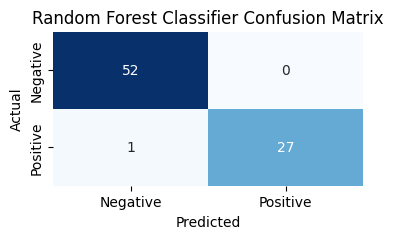

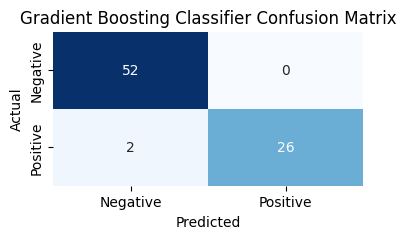

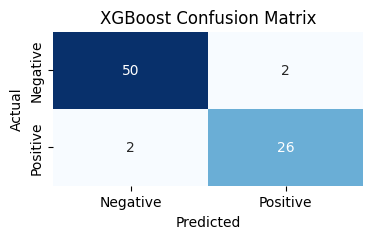

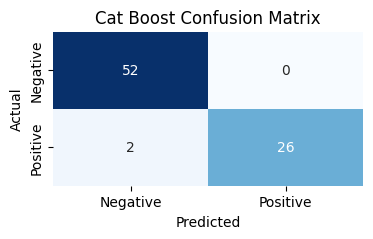

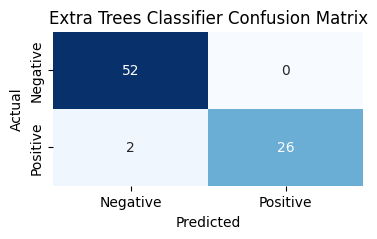

In [58]:
# Confusion Matrix Visualization Function
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Visualize Confusion Matrices
for model, pred in [('Random Forest Classifier', rfc_pred),
                    ('Gradient Boosting Classifier', gb_pred),
                    ('XGBoost', xgb_pred),
                    ('Cat Boost', cat_pred),
                    ('Extra Trees Classifier', etc_pred)]:

    plot_confusion_matrix(model, y_test, pred)

╒══════════════════════════════╤══════════╕
│ Model                        │   AUC-PR │
╞══════════════════════════════╪══════════╡
│ Logistic Regression          │ 0.778256 │
├──────────────────────────────┼──────────┤
│ KNN                          │ 0.517711 │
├──────────────────────────────┼──────────┤
│ Decision Tree Classifier     │ 0.779464 │
├──────────────────────────────┼──────────┤
│ Random Forest Classifier     │ 0.976786 │
├──────────────────────────────┼──────────┤
│ Ada Boost Classifier         │ 0.942347 │
├──────────────────────────────┼──────────┤
│ Gradient Boosting Classifier │ 0.953571 │
├──────────────────────────────┼──────────┤
│ Stochastic Gradient Boosting │ 0.572959 │
├──────────────────────────────┼──────────┤
│ XgBoost                      │ 0.887245 │
├──────────────────────────────┼──────────┤
│ Cat Boost                    │ 0.953571 │
├──────────────────────────────┼──────────┤
│ Extra Trees Classifier       │ 0.953571 │
├──────────────────────────────┼

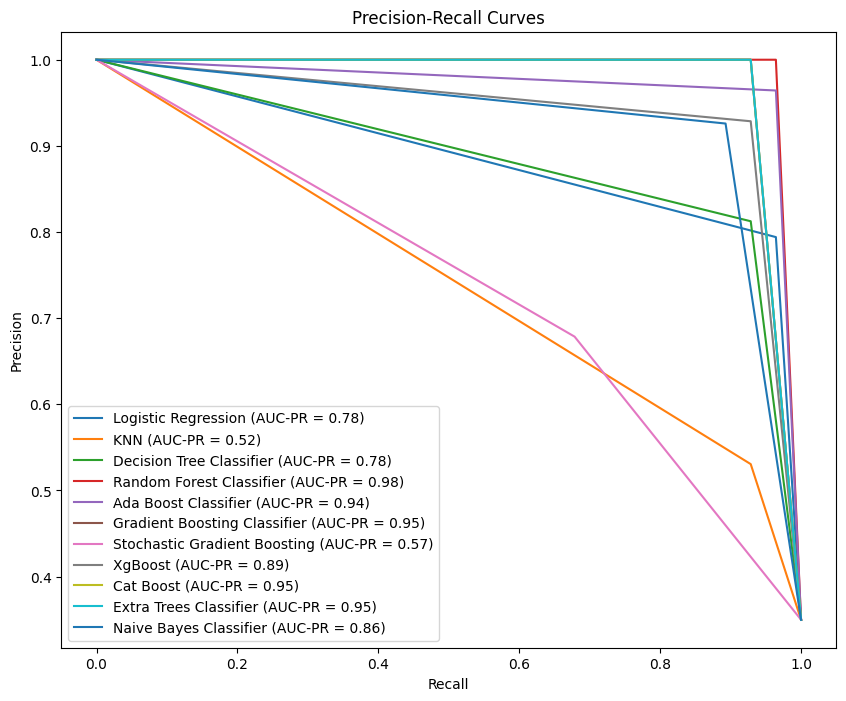

In [60]:
# Add the necessary import at the beginning of your code
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve

# Calculate AUC-PR
logreg_aucpr = average_precision_score(y_test, logreg_pred)
knn_aucpr = average_precision_score(y_test, knn_pred)
dtc_aucpr = average_precision_score(y_test, dtc_pred)
rfc_aucpr = average_precision_score(y_test, rfc_pred)
ada_aucpr = average_precision_score(y_test, ada_pred)
gb_aucpr = average_precision_score(y_test, gb_pred)
sgb_aucpr = average_precision_score(y_test, sgb_pred)
xgb_aucpr = average_precision_score(y_test, xgb_pred)
cat_aucpr = average_precision_score(y_test, cat_pred)
etc_aucpr = average_precision_score(y_test, etc_pred)
nb_aucpr = average_precision_score(y_test, nb_pred)

# Create a DataFrame with AUC-PR scores
aucpr_data = {
    'Model': [
        'Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
        'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Stochastic Gradient Boosting',
        'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'Naive Bayes Classifier'
    ],
    'AUC-PR': [
        logreg_aucpr, knn_aucpr, dtc_aucpr, rfc_aucpr, ada_aucpr, gb_aucpr, sgb_aucpr, xgb_aucpr, cat_aucpr, etc_aucpr, nb_aucpr
    ]
}

aucpr_df = pd.DataFrame(aucpr_data)
print(tabulate(aucpr_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Visualize Precision-Recall curves
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))
for model, pred in [('Logistic Regression', logreg_pred),
                    ('KNN', knn_pred),
                    ('Decision Tree Classifier', dtc_pred),
                    ('Random Forest Classifier', rfc_pred),
                    ('Ada Boost Classifier', ada_pred),
                    ('Gradient Boosting Classifier', gb_pred),
                    ('Stochastic Gradient Boosting', sgb_pred),
                    ('XgBoost', xgb_pred),
                    ('Cat Boost', cat_pred),
                    ('Extra Trees Classifier', etc_pred),
                    ('Naive Bayes Classifier', nb_pred)]:

    precision, recall, _ = precision_recall_curve(y_test, pred)
    plt.plot(recall, precision, label=f'{model} (AUC-PR = {average_precision_score(y_test, pred):.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

╒══════════════════════════════╤═══════════╕
│ Model                        │   AUC-ROC │
╞══════════════════════════════╪═══════════╡
│ Logistic Regression          │  0.914835 │
├──────────────────────────────┼───────────┤
│ KNN                          │  0.743132 │
├──────────────────────────────┼───────────┤
│ Decision Tree Classifier     │  0.906593 │
├──────────────────────────────┼───────────┤
│ Random Forest Classifier     │  0.982143 │
├──────────────────────────────┼───────────┤
│ Ada Boost Classifier         │  0.972527 │
├──────────────────────────────┼───────────┤
│ Gradient Boosting Classifier │  0.964286 │
├──────────────────────────────┼───────────┤
│ Stochastic Gradient Boosting │  0.752747 │
├──────────────────────────────┼───────────┤
│ XgBoost                      │  0.945055 │
├──────────────────────────────┼───────────┤
│ Cat Boost                    │  0.964286 │
├──────────────────────────────┼───────────┤
│ Extra Trees Classifier       │  0.964286 │
├─────────

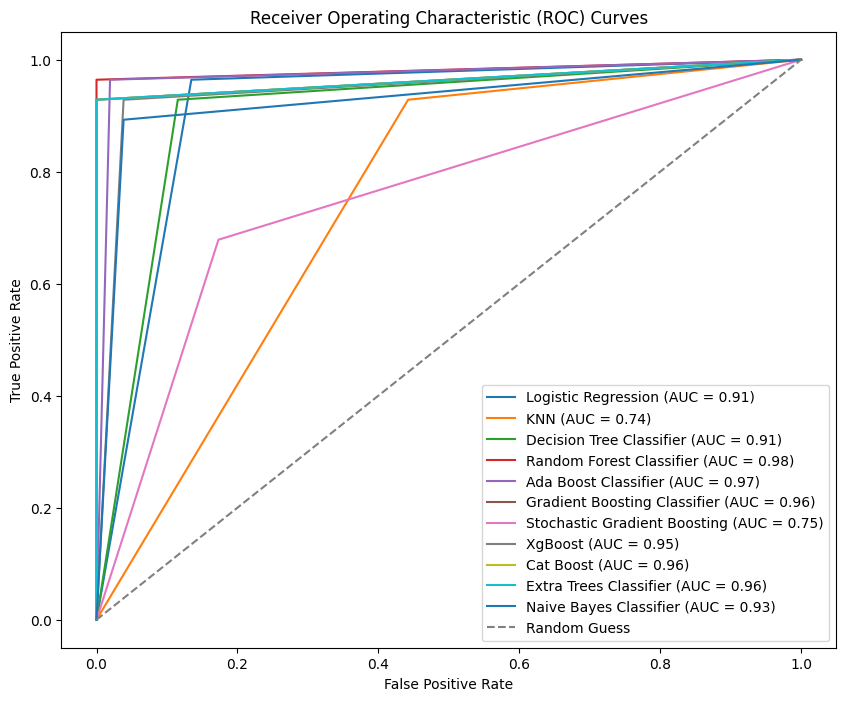

In [61]:
# Calculate AUC-ROC
logreg_aucroc = roc_auc_score(y_test, logreg_pred)
knn_aucroc = roc_auc_score(y_test, knn_pred)
dtc_aucroc = roc_auc_score(y_test, dtc_pred)
rfc_aucroc = roc_auc_score(y_test, rfc_pred)
ada_aucroc = roc_auc_score(y_test, ada_pred)
gb_aucroc = roc_auc_score(y_test, gb_pred)
sgb_aucroc = roc_auc_score(y_test, sgb_pred)
xgb_aucroc = roc_auc_score(y_test, xgb_pred)
cat_aucroc = roc_auc_score(y_test, cat_pred)
etc_aucroc = roc_auc_score(y_test, etc_pred)
nb_aucroc = roc_auc_score(y_test, nb_pred)

# Create a DataFrame with AUC-ROC scores
aucroc_data = {
    'Model': [
        'Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
        'Ada Boost Classifier', 'Gradient Boosting Classifier', 'Stochastic Gradient Boosting',
        'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'Naive Bayes Classifier'
    ],
    'AUC-ROC': [
        logreg_aucroc, knn_aucroc, dtc_aucroc, rfc_aucroc, ada_aucroc, gb_aucroc, sgb_aucroc, xgb_aucroc, cat_aucroc, etc_aucroc, nb_aucroc
    ]
}

aucroc_df = pd.DataFrame(aucroc_data)

print(tabulate(aucroc_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Visualize ROC curves
plt.figure(figsize=(10, 8))

for model, pred in [('Logistic Regression', logreg_pred),
                    ('KNN', knn_pred),
                    ('Decision Tree Classifier', dtc_pred),
                    ('Random Forest Classifier', rfc_pred),
                    ('Ada Boost Classifier', ada_pred),
                    ('Gradient Boosting Classifier', gb_pred),
                    ('Stochastic Gradient Boosting', sgb_pred),
                    ('XgBoost', xgb_pred),
                    ('Cat Boost', cat_pred),
                    ('Extra Trees Classifier', etc_pred),
                    ('Naive Bayes Classifier', nb_pred)]:

    fpr, tpr, _ = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc_score(y_test, pred):.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

<ipython-input-62-7b313bcc01b7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='cividis')


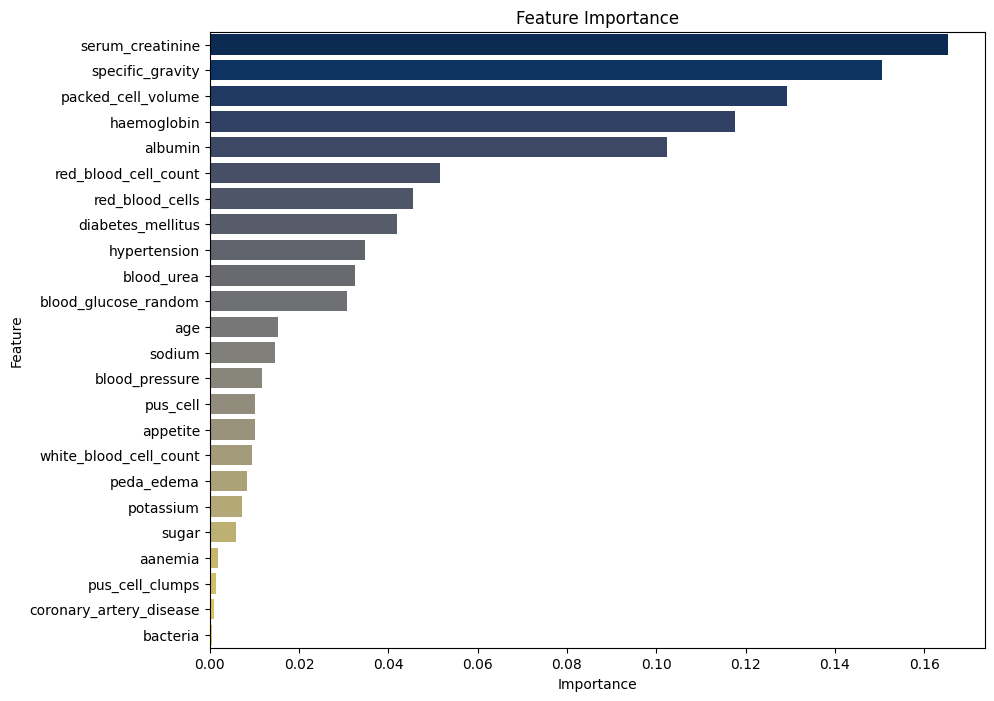

In [62]:
# Get feature importances
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

X = df[ind_col]
y = df[dep_col]

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='cividis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [63]:
import plotly.express as px

fig = px.bar(data_frame=models, x='Accuracy', y='Model', color='Accuracy',
             template='seaborn',
             title='Models Comparison',
             color_continuous_scale='Blues')
fig.show()


In [64]:
# Create a DataFrame with accuracy scores
models = pd.DataFrame({
    'Model': ['Random Forest Classifier', 'Gradient Boosting Classifier', 'XGBoost', 'Cat Boost', 'Extra Trees Classifier'],
    'Accuracy': [rfc_acc, gb_acc, xgb_acc, cat_acc, etc_acc]
})

# Sort the DataFrame by accuracy in descending order
models_sorted = models.sort_values(by='Accuracy', ascending=False)

# Print the sorted table
print(tabulate(models_sorted, headers='keys', tablefmt='grid', showindex=False))

+------------------------------+------------+
| Model                        |   Accuracy |
+==============================+============+
| Random Forest Classifier     |     0.9875 |
+------------------------------+------------+
| Gradient Boosting Classifier |     0.975  |
+------------------------------+------------+
| Cat Boost                    |     0.975  |
+------------------------------+------------+
| Extra Trees Classifier       |     0.975  |
+------------------------------+------------+
| XGBoost                      |     0.95   |
+------------------------------+------------+
